#                                 NYC Taxi Challenge 

In [1]:
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Dataset Description

* This dataset is data collected by the New York City Taxi and Limousine commission about "Green" Taxis. 
* Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan. We will use the data from  2015.

##  Dataset download and Validation

In [38]:
#read the dataset from local
df = pd.read_csv("2015_Green_Taxi_Trip_Data.csv",encoding="latin-1")
df.shape

(11437686, 21)

In [14]:
df.columns

Index(['vendorid', 'pickup_datetime', 'dropoff_datetime', 'Store_and_fwd_flag',
       'rate_code', 'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude',
       'Dropoff_latitude', 'Passenger_count', 'Trip_distance', 'Fare_amount',
       'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount',
       'Improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type'],
      dtype='object')

In [6]:
df.head()

,vendorid,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,01/01/2015 12:00:00 AM,01/01/2015 12:00:00 AM,N,1,-73.961418,40.806293,-73.948746,40.823627,1,...,6.5,0.5,0.5,1.40,0.0,NaN,0.3,9.20,1,1.0
1,1,01/01/2015 12:00:02 AM,01/01/2015 12:16:25 AM,N,1,-73.951454,40.824905,-73.895561,40.869946,1,...,19.0,0.5,0.5,0.00,0.0,NaN,0.3,20.30,2,1.0
2,2,01/01/2015 12:00:03 AM,01/01/2015 12:12:06 AM,N,1,-73.930908,40.694630,-73.956932,40.712601,1,...,10.0,0.5,0.5,2.62,0.0,NaN,0.3,13.92,1,1.0
3,2,01/01/2015 12:00:03 AM,01/01/2015 12:17:00 AM,N,1,-73.959808,40.813663,-73.882378,40.840015,1,...,21.0,0.5,0.5,0.00,0.0,NaN,0.0,22.00,2,1.0
4,2,01/01/2015 12:00:10 AM,01/01/2015 12:06:44 AM,N,1,-73.961418,40.714340,-73.961357,40.719212,1,...,6.0,0.5,0.5,1.95,0.0,NaN,0.0,8.95,1,1.0


#### Validation of dataset

In [3]:
#check if the dataset has null values and print columns
if(df.isnull().values.any()):
    print(df.columns[df.isnull().any()].tolist())

['Ehail_fee', 'Trip_type']


In [8]:
#number of rows in each column having null values
df['Trip_type'].isnull().sum()
df['Ehail_fee'].isnull().sum()

11437686

In [9]:
#Drop Ehail_fee column since all the rows are null
df.drop('Ehail_fee', axis=1, inplace=True)

In [11]:
#Replace NAN's in column Trip_type to median value
df['Trip_type'] = df['Trip_type'].replace(np.nan,df['Trip_type'].median())

## Analysis of 'Trip_distance' column

Text(0, 0.5, 'Count of trips')

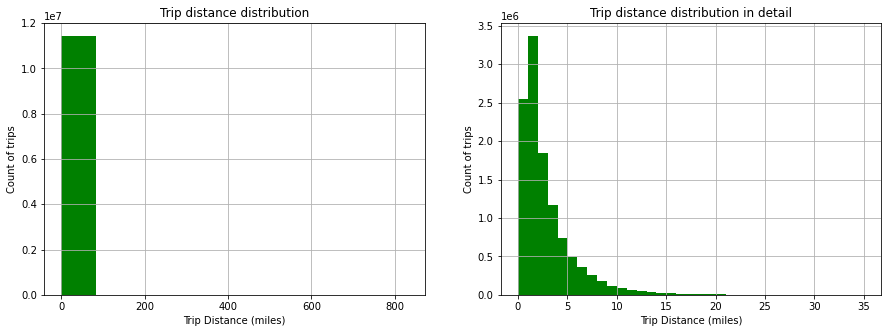

In [12]:
#plot histogram for 'Trip_distance' column
bins1=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35]
fig,axes=plt.subplots(1,2,figsize=(15,5))
df['Trip_distance'].hist(ax=axes[0],color='green')
axes[0].set_title('Trip distance distribution')
axes[0].set_xlabel('Trip Distance (miles)')
axes[0].set_ylabel('Count of trips')
df['Trip_distance'].hist(bins = bins1, ax=axes[1],color='green')
axes[1].set_title('Trip distance distribution in detail')
axes[1].set_xlabel('Trip Distance (miles)')
axes[1].set_ylabel('Count of trips')

#### Analysis 
* As we look into the first histogram above, we can understand that the trip distances do not really exceed more than 60 miles.
* To analyze this in more detail, I have plotted trip distances in the range of 0-35. By looking at this we can understand that, it has normal distribution skewed to the right. 
* And most of the trips travel a distance of about 1-4 miles.
* Looks like there are outliers after considering this distribution.

#### Hypothesis
*  Most of the trips are short distanced. Though this dataset does not have densely populated areas of Manhattan, people prefer such the trips are short.

## Mean and Median of 'Trip_distance' by hour of the day

In [42]:
#convert pickup and dropoff times into datetimes and extract hour of the pickup
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],format="%m/%d/%Y %I:%M:%S %p")

In [43]:
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'],format="%m/%d/%Y %I:%M:%S %p")
df['pickuptime_hour'] = df.pickup_datetime.apply(lambda x: x.hour)

In [44]:
#extract mean, median of trip_distance by hour of the day
meanmediandistance = df.pivot_table(index='pickuptime_hour', values='Trip_distance',aggfunc=('mean','median')).reset_index()

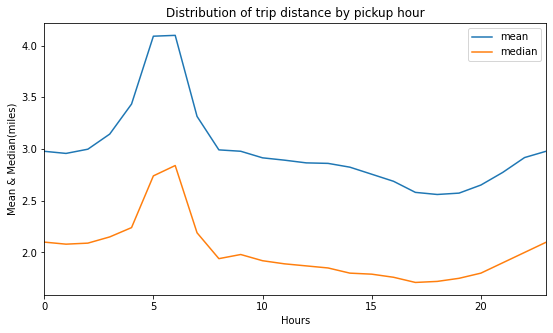

In [45]:
#plot the graphs
fig,ax = plt.subplots(1,1,figsize=(9,5))
meanmediandistance[['mean','median']].plot(ax=ax)
plt.ylabel('Mean & Median(miles)')
plt.xlabel('Hours')
plt.title('Distribution of trip distance by pickup hour')
plt.xlim([0,23])
plt.show()

#### Analysis
* By looking at the graph above, we can understand that people tend to have longer travels in the mornings around 4-9AM because of their travel to work or other reason because of the peak in both median and mean.
* During 4-9AM, Most of the people travel around 4.0 miles in the morning and the average distance people travel in the mornings is 2.8 Miles.
* This trend seems to decrease during afternoons and nights and tend to increase during midnight hours.


## derived variable for tip as a percentage of the total fare

In [49]:
df['tip_derived(%)']=(df['Tip_amount']/df['Total_amount'])*100

## Predictive model for tip

### Inorder to build a predictive model for tip, below are steps we have followed and the approach is discussed below.
### Data Validation
* All the amount values seems to have negative values, hence they are replaced with absolute values
* Store_and_fwd_flag column is a categorical variable having values Y/N so change them to 1/0

### Feature Engineering
* Trip Duration : I would like to see if the trip duration of trip influences the passenger to offer tip
* Speed : Speed might as well affect tip given to people, since people might like drivers driving fastly/slowly
* Shift : I have divided pickup time hour in to shifts to see which part of the day people tend to give more tips.
* See Correlation among variables to see which variables matter most

### Model Building
* The first step here is to predict if a transaction has a tip
##### Classification to predict if tip given
* Inorder to predict this, understand which variables influence Tip and used RandomForest Classifier to predict tip
##### Regression to predict tip percentage
* The next step is to predict Percentage of tip for all the predictions which have tip. Since the variables did not have a correlation(linear relationship), we used regression using trees(RandomForest Regressor) to predict percentage of tip given.

### Data Validation

###### Replace Negative values with absolute values

In [51]:
#Number of rows with negative values
df2 = df[(df['Fare_amount']<0)|(df['Extra']<0) |(df['MTA_tax']<0)|(df['Tip_amount']<0)|(df['Tolls_amount']<0)|(df['Total_amount']<0)]
df2.shape

(17048, 23)

In [52]:
#replace negative values with absolute values
df['Fare_amount'] = df['Fare_amount'].abs()
df['Extra'] = df['Extra'].abs()
df['MTA_tax'] = df['MTA_tax'].abs()
df['Tip_amount'] = df['Tip_amount'].abs()
df['Tolls_amount'] = df['Tolls_amount'].abs()
df['Total_amount'] = df['Total_amount'].abs()

###### Store_and_fwd_flag to numerical variable

In [53]:
df.Store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

In [54]:
df['Store_and_fwd_flag'] = df['Store_and_fwd_flag'].replace('Y',1)
df['Store_and_fwd_flag'] = df['Store_and_fwd_flag'].replace('N',0)

### Feature Engineering

###### Derived Variables

In [56]:
#duration of trip in minutes
df['tripduration'] = ((df['dropoff_datetime'] - df['pickup_datetime']).apply(lambda x:x.total_seconds()/60.0))

In [57]:
#speed in miles per hour
df['speed'] = df['Trip_distance']/(df['tripduration']/60)

In [58]:
#shift
df['Shift_type'] = np.NAN
df.loc[df[(df.pickuptime_hour>=7) & (df.pickuptime_hour<15)].index,'Shift_type'] = 1
df.loc[df[(df.pickuptime_hour>=15) & (df.pickuptime_hour<23)].index,'Shift_type'] = 2
df.loc[df[df.Shift_type.isnull()].index,'Shift_type'] = 3

In [59]:
# create with_tip variable
df['With_tip'] = (df['tip_derived(%)']>0)*1

In [60]:
#replace NAN or infinity values
df['With_tip'] = df['With_tip'].replace(np.nan,0.0)
df['tip_derived(%)'] = df['tip_derived(%)'].replace(np.nan,0.0)
df['speed'] = df['speed'].replace(np.nan,0.0)
df = df.replace(np.inf, np.nan)
df = df.fillna(0)

In [61]:
#backup dataframe
df_backup = df.copy()

In [62]:
#since we are not using these column, drop them
df.drop('pickup_datetime', axis=1, inplace=True)
df.drop('dropoff_datetime', axis=1, inplace=True)
df.drop('Pickup_longitude', axis=1, inplace=True)
df.drop('Pickup_latitude', axis=1, inplace=True)
df.drop('Dropoff_longitude', axis=1, inplace=True)
df.drop('Dropoff_latitude', axis=1, inplace=True)

###### Distribution of 'tip_derived(%)' column

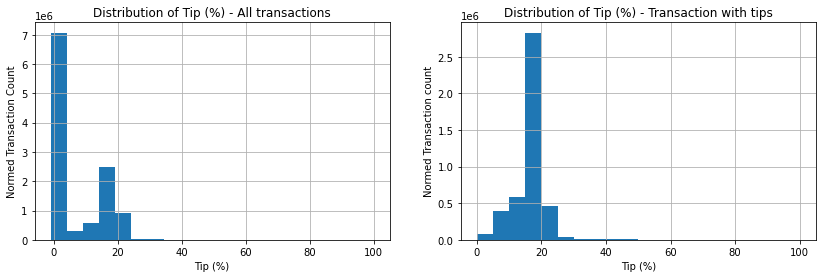

In [64]:
# generate histograms to see distribution of tip
data1 = df[df['tip_derived(%)']>0]
data2 = df[df['tip_derived(%)']==0]

#Tip percentage vs all transactions
fig,ax=plt.subplots(1,2,figsize=(14,4))
df['tip_derived(%)'].hist(bins = 20,stacked=True,ax=ax[0])
ax[0].set_xlabel('Tip (%)')
ax[0].set_ylabel('Normed Transaction Count')
ax[0].set_title('Distribution of Tip (%) - All transactions')

#Tip percentage vs Transactions with tips
data1['tip_derived(%)'].hist(bins = 20,stacked=True,ax=ax[1])
ax[1].set_xlabel('Tip (%)')
ax[1].set_title('Distribution of Tip (%) - Transaction with tips')
ax[1].set_ylabel('Normed Transaction count')
plt.show()

### Analysis
* The histogram on the left side represents distribution of tip with respect to all transactions. Looks like most of the trasactions does not have tip(around 60% of transactions).
* Among the transactions that have tip, most of the transactions have the tip percentage between 16-25%

###### Correlation among variables

C:\Users\Rajmohan\AppData\Local\Temp/ipykernel_16496/1816167355.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

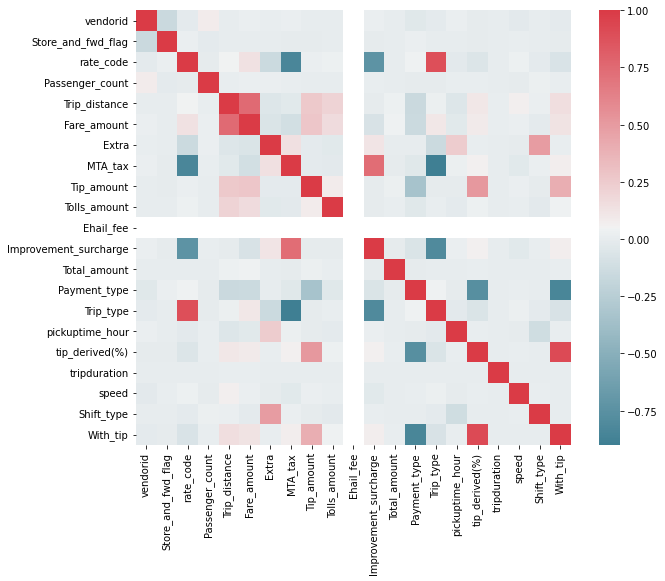

In [65]:
#Correlation among variables
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### Analysis
* By looking at the above plot, 'With_Tip'is highly influenced by columns Tip_Derived(%), Total_amount, MTA_Tax, Extra, improvement_surcharge, Tolls_amount, Tip_amount, Fare_amount and Trip_distance
* Since Total_amount is highly correlated to Fare_amount and Tolls_amount, we consider Total_amount for our analysis.
* With_tip is derived from Tip_amount, Tip_Derived(%), hence we disregard those characterists
* Hence we finally consider Total_amount, MTA_Tax, improvement_surcharge, Extra including derived variables speed, tripduration, pickuptime_hour

### Classification

### Random Forest Classification - Prediction if tip given

For tip prediction, we have used a sample dataset of 300000 transactions and split them into test and training datasets.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [68]:
#Features for classification
columnsforclassification = ['Payment_type','Trip_distance','Total_amount','tripduration','speed','MTA_tax',
              'Extra','Improvement_surcharge','pickuptime_hour','With_tip']
dfclass =  df[columnsforclassification]

In [69]:
#consider part of the dataset for our analysis
train = dfclass.copy()
train = df.loc[np.random.choice(train.index,size=300000,replace=False)]

In [78]:
#split dataset into train and test
df_y = train['With_tip'].tolist()
df_x = train.drop('With_tip', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
X_train.shape,len(y_train),X_test.shape,len(y_test)

((240000, 20), 240000, (60000, 20), 60000)

In [79]:
#RandomForest Classifier with estimators 200
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=50, n_jobs=-1)

In [80]:
import pickle
with open('rf_classifier.pkl','wb') as fid:
    pickle.dump(rfc,fid)
    fid.close()

In [81]:
#Confusion Matrix
y_predict = rfc.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_predict),columns=['Predicted Tip Given', 'Predicted Tip not Given'],
             index=['Actual Tip Given', 'Actual Tip not Given'])

,Predicted Tip Given,Predicted Tip not Given
Actual Tip Given,37040,0
Actual Tip not Given,0,22960


In [82]:
#Accuracy on training dataset and test dataset
print ('RF accuracy: TRAINING', rfc.score(X_train,y_train))
print ('RF accuracy: TESTING', rfc.score(X_test,y_test))

RF accuracy: TRAINING 1.0
RF accuracy: TESTING 1.0


ROC AUC: 1.00


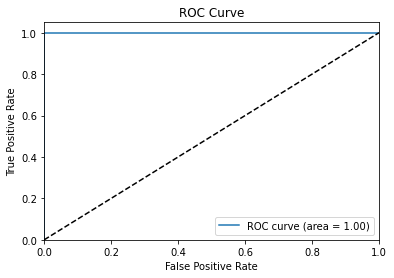

In [83]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Analysis
* With the given featureset, we can correctly predict if a transaction has tip or not
* The model does not have any false negatives or false positives.
* Prediction of whether a tip is given worked well on both training and testing dataset

### Regression

C:\Users\Rajmohan\AppData\Local\Temp/ipykernel_16496/1816167355.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

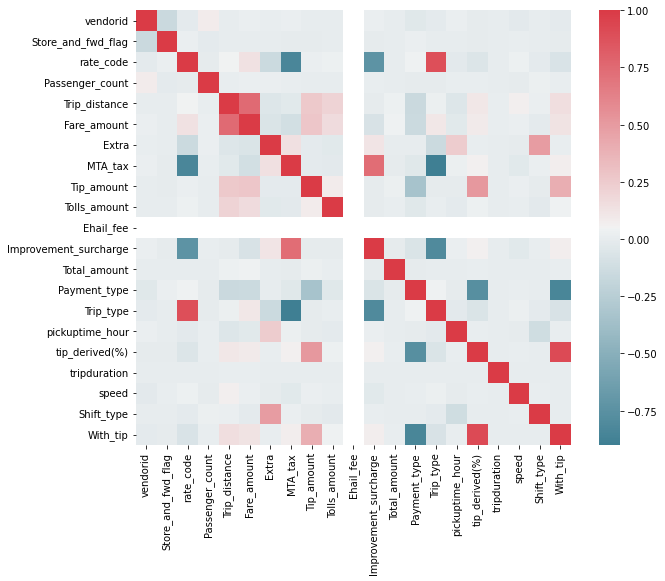

In [84]:
#Correlation among variables
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Analysis
* 'Tip_derived(%)' variable is highly influenced by Trip_distance, Fare_amount, MTA_Tax, Tip_Amount, Tolls_Amount, With_tip
* All the amount related columns are highly correlated to Total_amount and hence we consider that for our analysis including derived variables 
* Since all the transactions having tip are mostly paid using Credit Card, we ignore feature 'Payment_Type'

### Random Forest Regressor Model - Prediction of Tip Percentage

###### Steps
* We use part of the dataset for our analysis
* Extract test and training dataset from main dataframe
* USing these parameters fit the model and predict the tip percentage


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [88]:
#predictors and target variable used for regression
predictors = ['Total_amount', 'Trip_distance', 'tripduration', 'speed','Shift_type']
train['ID'] = train.index
target = 'tip_derived(%)'

In [89]:
#train and test datasets extracted from main dataframe
train = df.copy()
train = train.loc[np.random.choice(train.index,size=100000,replace=False)]
indices = df.index[~df.index.isin(train.index)]
test = df.loc[np.random.choice(indices,size=100000,replace=False)]

In [97]:
#Random Forest regressor model with estimator 'mean_squared_error'
rfr = RandomForestRegressor(n_jobs=-1,criterion='mse' ,n_estimators=120)

In [98]:
import pickle
with open('rfr.pkl','wb') as fid:
    pickle.dump(rfr,fid)
    fid.close()

### Check performance on training dataset using parameters obtained

In [106]:
from sklearn.model_selection import cross_val_score
# train the algorithm on data
rfr.fit(train[predictors],train[target])

#prediction on training dataset using cross validation
train_predictions = rfr.predict(train[predictors])
cv_score = cross_val_score(rfr,train[predictors],train[target],cv=5)

#model evaluation metrics
print("mean_squared_error:",mean_squared_error(train[target].values,train_predictions))
print("CV Score - Mean : %.7g | Std Dev : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

mean_squared_error: 1.9949262683325384
CV Score - Mean : 0.8191319 | Std Dev : 0.008627409 | Min : 0.807253 | Max : 0.830416


In [107]:
ypred = rfr.predict(test[predictors])
print('RFR test mse:',mean_squared_error(ypred,test['tip_derived(%)']))
print('RFR r2:', r2_score(ypred,test['tip_derived(%)']))

RFR test mse: 14.090375780443988
RFR r2: 0.7835654194134924


#### Analysis
* The best optimal number of trees for which results are good is 120
* The mean square error was used as a valuation metric
* r2 coefficient is 0.78 which is good result

### Prediction of Tip on new Dataset

### Steps:
* To predict tip for new dataset, we first predict if the transaction has tip using Classification model
* If the transaction has tip, we predict tip percentage using Regression model

In [112]:
def predict_tip(transaction):
    reg_predictors = ['Total_amount','Trip_distance', 'tripduration', 'speed','Shift_type']  
    has_tip = transaction['With_tip'] # classify transactions  
    return has_tip*rfr.predict(transaction[reg_predictors]) ## predict tips for those transactions classified as 1

In [113]:
test1 = df.loc[np.random.choice(df.index,size = 100000,replace=False)]
ypred = predict_tip(test1)
print("final mean_squared_error:", mean_squared_error(ypred,test1['tip_derived(%)']))
print("final r2_score:", r2_score(ypred,test1['tip_derived(%)']))

final mean_squared_error: 8.7220192444543
final r2_score: 0.8669822303434938


#### Analysis
* The mean square error was used as a valuation metric
* mean square error on the same training dataset is: 8.72
* r2 coefficient is 0.866 which is good result even compared to performance on training dataset

### Build a derived variable representing the average speed over the course of a trip.

In [156]:
#get original dataframe with all the columns
df_q5 = df_backup

In [157]:
import datetime
df_q5['week']= df_q5.pickup_datetime.apply(lambda x:x.isocalendar()[1])

In [158]:
df_q5 = df_q5.loc[df_q5['week'].isin(range(1,6))]

In [159]:
#get mean of speed by week
df_q5[['speed','week']].groupby('week').mean()

,speed
week,
1,16.779227
2,14.936463
3,15.343254
4,15.449656
5,14.919969


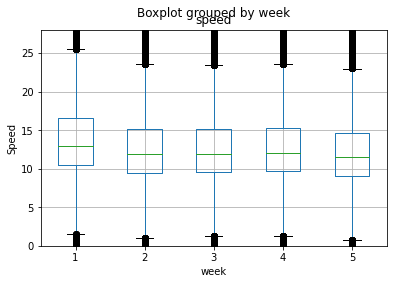

In [161]:
# generate boxplot for all the weeks in September
df_q5.boxplot('speed','week')
plt.ylim([0,28])
plt.ylabel('Speed')
plt.show()

#### Analysis
* The median speed in the weeks 2 and 3 is almost same. Weeks 1 and 4 have higher median speeds when compared to weeks 2 and 3 and week 5 has lower median average speed

#### Perform T-test to see if all the weeks have same average speed

Hypothesis: The mean values for two weeks are same
* We perform this analysis for all combinations of weeks to see which weeks have same average speed


In [166]:
from scipy.stats import ttest_ind, ttest_ind_from_stats,f_oneway
weeks = pd.unique(df_q5.week)
pvals = []
for i in range(len(weeks)): # for each pair, run t-test
    for j in range(len(weeks)):
        pvals.append((weeks[i], weeks[j],ttest_ind(df_q5[df_q5.week==weeks[i]].speed,df_q5[df_q5.week==weeks[j]].speed,equal_var=False)[1]))
    
pvalues = pd.DataFrame(pvals,columns=['w1','w2','pval'])
print(pvalues.pivot_table(index='w1',columns='w2',values='pval').T)

w1             1             2         3         4             5
w2                                                              
1   1.000000e+00  1.238643e-08  0.000088  0.000134  5.518011e-08
2   1.238643e-08  1.000000e+00  0.198275  0.082119  9.543600e-01
3   8.757713e-05  1.982748e-01  1.000000  0.755161  2.066249e-01
4   1.335976e-04  8.211902e-02  0.755161  1.000000  9.309249e-02
5   5.518011e-08  9.543600e-01  0.206625  0.093092  1.000000e+00


#### Analysis
Weeks 2 and 3 have higher p values which means they have same average speeds

In [167]:
# calculate anova
hours = range(24)
ftest = "f_oneway("
for h in hours:
    ftest+="df_q5[df_q5.pickuptime_hour=="+str(h)+"].speed,"
ftest=ftest[:-1]+")"
print("F Test:", eval(ftest)) #evaluate the command and print

F Test: F_onewayResult(statistic=13.131548549791194, pvalue=1.805657282269184e-50)


#### Analysis

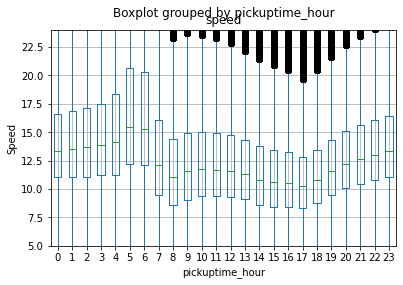

In [168]:
# boxplot
df_q5.boxplot('speed','pickuptime_hour')
plt.ylim([5,24])
plt.ylabel('Speed')
plt.show()

## Improvements which can be done

* During Tip Percentage prediction, I can use statistical methods to find relationship between features to find if ther are important for our analysis
* Also histogram of tip percentage with respect to each feature helps to understand their influence on target variable
* I can even use Latitudes and Longitues to understand area the taxi travelled and extract demographic related analysis
* Right now, I have limited my dataset size because of computational issues and time, but using BigData technologies like Spark we can use entire data for our analysis which might produce even better results